In [1]:
%matplotlib inline


# Football


Load football network in GML format and compute some network statistcs.

Shows how to download GML graph in a zipped file, unpack it, and load
into a NetworkX graph.

Requires Internet connection to download the URL
http://www-personal.umich.edu/~mejn/netdata/football.zip



The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

Missouri 10
NevadaLasVegas 12
Illinois 11
Idaho 9
BostonCollege 11
BoiseState 9
Army 11
Rice 11
SanJoseState 11
Kent 10
ArizonaState 11
Louisville 10
LouisianaState 10
Arkansas 10
MichiganState 11
Texas 11
Kansas 10
UCLA 1

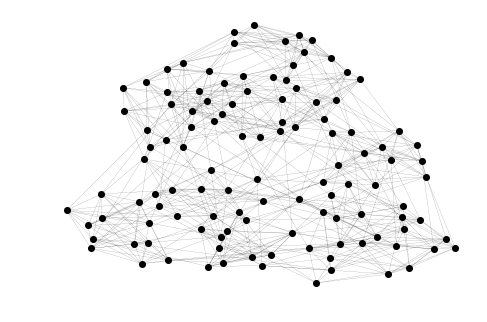

In [2]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2007-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print('%s %d' % (n, d))

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()